## Download Dataset

In [ ]:
# # ISIC2018 dataset
# # https://challenge.isic-archive.com/data/#2018
# isic_path = './data/ISIC2018/'
# !wget -P {isic_path} https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_Input.zip
# !wget -P {isic_path} https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_LesionGroupings.csv
# !wget -P {isic_path} https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_GroundTruth.zip
# !wget -P {isic_path} https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_Input.zip
# !wget -P {isic_path} https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_GroundTruth.zip
# !wget -P {isic_path} https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_Input.zip
# !wget -P {isic_path} https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_GroundTruth.zip
# !wget -P {isic_path} https://creativecommons.org/licenses/by-nc/4.0/

In [ ]:
# # KvasirPogorelov dataset
# # https://dl.acm.org/doi/pdf/10.1145/3083187.3083212
# # https://dl.acm.org/do/10.1145/3193289/full/
# kvp_path = './data/KvasirPogorelov/'
# !wget -P {kvp_path} https://dl.acm.org/do/10.1145/3193289/full/packageFiles/kvasir-dataset-features-1606843201547.zip
# !wget -P {kvp_path} https://dl.acm.org/do/10.1145/3193289/full/packageFiles/kvasir-dataset-v2-features-1606843201547.zip
# !wget -P {kvp_path} https://dl.acm.org/do/10.1145/3193289/full/packageFiles/kvasir-dataset-v2-folds-features-1606843201547.zip
# !wget -P {kvp_path} https://dl.acm.org/do/10.1145/3193289/full/packageFiles/kvasir-dataset-v2-folds-1606843201547.zip
# !wget -P {kvp_path} https://dl.acm.org/do/10.1145/3193289/full/packageFiles/kvasir-dataset-v2-1606843201547.zip
# !wget -P {kvp_path} https://dl.acm.org/do/10.1145/3193289/full/packageFiles/kvasir-dataset-1606843201547.zip
# !wget -P {kvp_path} https://dl.acm.org/do/10.1145/3193289/full/textFiles/kvasir-readme-1606843201547.txt

In [ ]:
# !unzip './data/ISIC2018/*.zip' -d './data/ISIC2018/'
# !unzip './data/KvasirPogorelov/*.zip' -d './data/KvasirPogorelov/'

In [ ]:
# os.mkdir('./data/processed_data')
# os.mkdir('./data/processed_data/ISIC2018')
# os.mkdir('./data/processed_data/KvasirPogorelov')

## Import Module

In [ ]:
!pip install albumentations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import shutil
import albumentations as A
from tqdm.notebook import tqdm
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.optimizers import *
import math

## Split dataset
#### Note: We will create train and test dir, after that apply data augument on train data.

### Kvasir Dataset

In [ ]:
# root_data='./data/'
# kv=os.listdir(root_data+'KvasirPogorelov/kvasir-dataset')

# for folder in kv:
#     print(folder)
#     files=os.listdir('./data/KvasirPogorelov/kvasir-dataset/'+folder)
#     print(len(files))

#     random.seed(42)

#     train_ratio = 0.5
#     test_ratio = 0.5

#     train_paths, test_paths = train_test_split(files, test_size=test_ratio, random_state=42)

#     print(f"Training set: {len(train_paths)} files")
#     print(f"Testing set: {len(test_paths)} files")

#     for i in tqdm(train_paths):
#         shutil.copy2(f'{root_data}KvasirPogorelov/kvasir-dataset/{folder}/{i}', f'{root_data}processed_data/KvasirPogorelov/kvasir-dataset/train/{folder}/{i}')

#     for i in tqdm(test_paths):
#         shutil.copy2(f'{root_data}KvasirPogorelov/kvasir-dataset/{folder}/{i}', f'{root_data}processed_data/KvasirPogorelov/kvasir-dataset/test/{folder}/{i}')

ulcerative-colitis
500
Training set: 250 files
Testing set: 250 files


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

normal-cecum
500
Training set: 250 files
Testing set: 250 files


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

esophagitis
500
Training set: 250 files
Testing set: 250 files


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

dyed-lifted-polyps
500
Training set: 250 files
Testing set: 250 files


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

dyed-resection-margins
500
Training set: 250 files
Testing set: 250 files


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

normal-pylorus
500
Training set: 250 files
Testing set: 250 files


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

polyps
500
Training set: 250 files
Testing set: 250 files


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

normal-z-line
500
Training set: 250 files
Testing set: 250 files


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

### ISIC 2018 Dataset

In [ ]:
# isic=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
# for i in isic:
#     os.mkdir(f'./data/processed_data/ISIC2018/test/{i}')
#     os.mkdir(f'./data/processed_data/ISIC2018/train/{i}')

In [ ]:
data=pd.read_csv('./data/ISIC2018/ISIC2018_Task3_Training_GroundTruth/ISIC2018_Task3_Training_GroundTruth.csv')
data

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10011,ISIC_0034317,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10012,ISIC_0034318,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10013,ISIC_0034319,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = pd.melt(data, id_vars=['image'], var_name='class', value_name='value')
data = data[data['value'] == 1]
data = data.drop(columns=['value'])
data = data.reset_index(drop=True)
data

,image,class
0,ISIC_0024310,MEL
1,ISIC_0024313,MEL
2,ISIC_0024315,MEL
3,ISIC_0024323,MEL
4,ISIC_0024333,MEL
...,...,...
10010,ISIC_0033844,VASC
10011,ISIC_0033969,VASC
10012,ISIC_0033991,VASC
10013,ISIC_0034196,VASC


In [ ]:
# They are melanocytic nevi (6705), dermatofibroma (115),
# melanoma (1113), actinic keratosis (327), benign keratosis (1099),
# basal cell carcinoma (514), and vascular lesions (142).
import numpy as np
np.unique(data['class'], return_counts=True)

(array(['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC'], dtype=object),
 array([ 327,  514, 1099,  115, 1113, 6705,  142]))

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
data_path = './data/ISIC2018/ISIC2018_Task3_Training_Input'
end_path = './data/processed_data/ISIC2018'

train_df, test_df = train_test_split(data, test_size=0.3, random_state=42)
print(len(train_df))
print(len(test_df))
# for index, row in tqdm(train_df.iterrows()):
#     shutil.copy2(f'{data_path}/{row['image']}.jpg', f'{end_path}/train/{row['class']}')

# for index, row in tqdm(test_df.iterrows()):
#     shutil.copy2(f'{data_path}/{row['image']}.jpg', f'{end_path}/test/{row['class']}')

7010
3005


## Kvasir Dataset Visualization and Augument

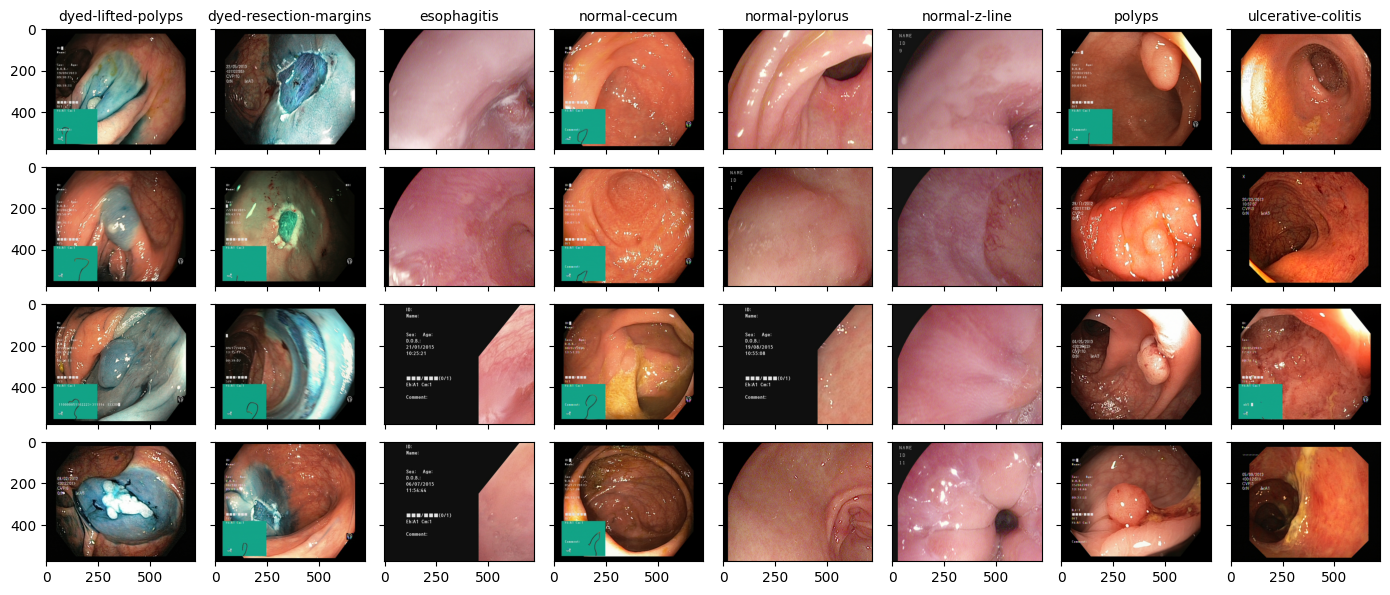

In [ ]:
train_dir = './data/processed_data/KvasirPogorelov/kvasir-dataset/train'
imgs = []
# radom choice 4 images each classes
for folder in os.listdir(train_dir):
    imgs.append([*map(lambda file_name: (file_name, folder), random.sample(os.listdir(f'{train_dir}/{folder}'),4))])

fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(14,6))

for i, img in enumerate(imgs):
    for j in range(len(img)):
        ax[j][i].imshow(plt.imread(f'{train_dir}/{img[j][1]}/{img[j][0]}'))
        ax[j][i].set_aspect('equal')
    ax[0][i].set_title(img[0][1], size = 10)

plt.subplots_adjust(wspace=1, hspace=0.2)
plt.tight_layout()

### Augmentation

In [ ]:
train_dir = './data/processed_data/KvasirPogorelov/kvasir-dataset/train'
aug_train_dir = './data/processed_data/KvasirPogorelov/kvasir-dataset/aug_train'
aug_dir = ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum',
           'normal-pylorus', 'normal-z-line', 'polyps','ulcerative-colitis']
transform = A.Compose([
    A.HorizontalFlip(p = 0.5),
    A.VerticalFlip(p = 0.5),
    A.augmentations.geometric.rotate.Rotate(limit=70,
                                            interpolation =None,
                                            border_mode =None,
                                            always_apply=False, p=0.5),
    A.augmentations.geometric.transforms.Affine(scale = (1, 1.2), p = 0.5)
])

for i in aug_dir:
    files = os.listdir(f'{train_dir}/{i}')
    for file in tqdm(files):
        img = plt.imread(f'{train_dir}/{i}/{file}')
        img = transform(image = img)['image']
        cv2.imwrite(f'{aug_train_dir}/{i}/aug_{file}', img)

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

### Create data loader

In [ ]:
def create_ds(train_dir, test_dir, img_size=(224,224), batch_size = 32):
    img_height, img_width = img_size
    train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            seed=123,
                                                            color_mode="rgb",
                                                            interpolation="nearest",
                                                            image_size=(img_height, img_width),
                                                            batch_size=batch_size)

    test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                            seed=123,
                                                            color_mode="rgb",
                                                            interpolation="nearest",
                                                            image_size=(img_height, img_width),
                                                            batch_size=batch_size,
                                                            shuffle=False)

    train_ds = train_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    test_ds = test_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return train_ds, test_ds

In [ ]:
train_dir = './data/processed_data/KvasirPogorelov/kvasir-dataset/aug_train'
test_dir = './data/processed_data/KvasirPogorelov/kvasir-dataset/test'
train_ds, test_ds = create_ds(train_dir, test_dir)

Found 4000 files belonging to 8 classes.
Found 2000 files belonging to 8 classes.


## CNN Model

In [ ]:
def cnn_model(activation = 'relu', learning_rate=0.0001, classes=8):
    keras.backend.clear_session()

    input = tf.keras.layers.Input(shape = (224,224, 3))
    x = tf.keras.layers.Conv2D(32, kernel_size = (3,3), padding = "same", activation = activation)(input)
    x = tf.keras.layers.Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x)
    x2 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x)
    x2 = tf.keras.layers.MaxPooling2D((2,2))(x2)
    x2 = tf.keras.layers.BatchNormalization()(x2)

    x3 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x2)
    x3 = tf.keras.layers.Conv2D(128, kernel_size = (3,3), padding = "same", activation = activation)(x3)
    x3 = tf.keras.layers.Conv2D(256, kernel_size = (3,3), padding = "same", activation = activation)(x3)
    x3 = tf.keras.layers.Dropout(0.2)(x3)
    x3 = tf.keras.layers.MaxPooling2D((2,2))(x3)
    x3 = tf.keras.layers.BatchNormalization()(x3)

    x3 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x3)
    x3 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x3)
    x3 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x3)
    x3 = tf.keras.layers.MaxPooling2D((2,2))(x3)
    x3 = tf.keras.layers.BatchNormalization()(x3)

    x4 = tf.keras.layers.Flatten()(x3)

    x5 = tf.keras.layers.Dense(128, activation = activation)(x4)
    x5 = tf.keras.layers.Dropout(0.2)(x5)
    x6 = tf.keras.layers.Dense(32, kernel_initializer='he_uniform', activation = activation)(x5)
    x6 = tf.keras.layers.Dense(classes, activation= "softmax")(x6)

    model = tf.keras.Model(inputs=input, outputs=x6)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
    return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 112, 112, 64)      256       
 Normalization)                                              

## Dual-attention CNN Model

In [ ]:
# Spatial Attention reimplement of paper "BAM - Bottleneck Attention Module"
# https://arxiv.org/pdf/1807.06514
class SpatialGate(tf.keras.layers.Layer):
    def __init__(self, gate_channel, reduction_ratio=16, dilation_conv_num=2, dilation_val=4):
        super(SpatialGate, self).__init__()

        self.gate_s = tf.keras.Sequential()
        self.gate_s.add(tf.keras.layers.Conv2D(gate_channel//reduction_ratio, kernel_size=1, use_bias=False, activation = 'relu'))
        self.gate_s.add(tf.keras.layers.BatchNormalization())

        for i in range(dilation_conv_num):
            self.gate_s.add(tf.keras.layers.Conv2D(gate_channel//reduction_ratio, kernel_size=3,
                                                   padding='same', dilation_rate=dilation_val, use_bias=False, activation = 'relu'))
            self.gate_s.add(tf.keras.layers.BatchNormalization())

        self.gate_s.add(tf.keras.layers.Conv2D(1, kernel_size=1, use_bias=False))

    def call(self, in_tensor):
        x = self.gate_s(in_tensor)
        x = tf.tile(x, [1, 1, 1, in_tensor.shape[-1]])
        return x

In [ ]:
# MultiSpectralDCTLayer reimplement of paper "FcaNet: Frequency Channel Attention Networks".
# https://arxiv.org/abs/2012.11879
def get_freq_indices(method):
    assert method in ['top1', 'top2', 'top4', 'top8', 'top16', 'top32',
                      'bot1', 'bot2', 'bot4', 'bot8', 'bot16', 'bot32',
                      'low1', 'low2', 'low4', 'low8', 'low16', 'low32']
    num_freq = int(method[3:])
    if 'top' in method:
        all_top_indices_x = [0, 0, 6, 0, 0, 1, 1, 4, 5, 1, 3, 0, 0, 0, 3, 2, 4, 6, 3, 5, 5, 2, 6, 5, 5, 3, 3, 4, 2, 2, 6, 1]
        all_top_indices_y = [0, 1, 0, 5, 2, 0, 2, 0, 0, 6, 0, 4, 6, 3, 5, 2, 6, 3, 3, 3, 5, 1, 1, 2, 4, 2, 1, 1, 3, 0, 5, 3]
        mapper_x = all_top_indices_x[:num_freq]
        mapper_y = all_top_indices_y[:num_freq]
    elif 'low' in method:
        all_low_indices_x = [0, 0, 1, 1, 0, 2, 2, 1, 2, 0, 3, 4, 0, 1, 3, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4]
        all_low_indices_y = [0, 1, 0, 1, 2, 0, 1, 2, 2, 3, 0, 0, 4, 3, 1, 5, 4, 3, 2, 1, 0, 6, 5, 4, 3, 2, 1, 0, 6, 5, 4, 3]
        mapper_x = all_low_indices_x[:num_freq]
        mapper_y = all_low_indices_y[:num_freq]
    elif 'bot' in method:
        all_bot_indices_x = [6, 1, 3, 3, 2, 4, 1, 2, 4, 4, 5, 1, 4, 6, 2, 5, 6, 1, 6, 2, 2, 4, 3, 3, 5, 5, 6, 2, 5, 5, 3, 6]
        all_bot_indices_y = [6, 4, 4, 6, 6, 3, 1, 4, 4, 5, 6, 5, 2, 2, 5, 1, 4, 3, 5, 0, 3, 1, 1, 2, 4, 2, 1, 1, 5, 3, 3, 3]
        mapper_x = all_bot_indices_x[:num_freq]
        mapper_y = all_bot_indices_y[:num_freq]
    else:
        raise NotImplementedError
    return mapper_x, mapper_y

class MultiSpectralAttentionLayer(tf.keras.layers.Layer):
    def __init__(self, channel, dct_h, dct_w, reduction=16, freq_sel_method='top16'):
        super(MultiSpectralAttentionLayer, self).__init__()
        self.reduction = reduction
        self.dct_h = dct_h
        self.dct_w = dct_w

        mapper_x, mapper_y = get_freq_indices(freq_sel_method)
        self.num_split = len(mapper_x)
        mapper_x = [temp_x * (dct_h // 7) for temp_x in mapper_x]
        mapper_y = [temp_y * (dct_w // 7) for temp_y in mapper_y]

        self.dct_layer = MultiSpectralDCTLayer(dct_h, dct_w, mapper_x, mapper_y, channel)
        self.fc = tf.keras.Sequential([
            tf.keras.layers.Dense(channel // reduction, use_bias=False),
            tf.keras.layers.ReLU(),
            tf.keras.layers.Dense(channel, use_bias=False),
            tf.keras.layers.Activation('sigmoid')
        ])

    def call(self, x):
        n, h, w, c = x.shape
        x_pooled = x
        if h != self.dct_h or w != self.dct_w:
            x_pooled = tf.image.resize(x, (self.dct_h, self.dct_w))
        y = self.dct_layer(x_pooled)
        y = self.fc(y)
        y = tf.expand_dims(tf.expand_dims(y, axis=1), axis=1)
        return x * y

class MultiSpectralDCTLayer(tf.keras.layers.Layer):
    def __init__(self, height, width, mapper_x, mapper_y, channel):
        super(MultiSpectralDCTLayer, self).__init__()

        assert len(mapper_x) == len(mapper_y)
        assert channel % len(mapper_x) == 0

        self.num_freq = len(mapper_x)
        self.height = height
        self.width = width
        self.mapper_x = mapper_x
        self.mapper_y = mapper_y
        self.channel = channel
        self.weight = tf.Variable(initial_value=self.get_dct_filter(), trainable=False, name='weight')


    def call(self, x):
        x = x * self.weight
        result = tf.reduce_sum(x, axis=[2, 3])
        return result

    def build_filter(self, pos, freq, POS):
        result = math.cos(math.pi * freq * (pos + 0.5) / POS) / math.sqrt(POS)
        if freq == 0:
            return result
        else:
            return result * math.sqrt(2)

    def get_dct_filter(self):
        dct_filter = np.zeros((self.height, self.width, self.channel))
        c_part = self.channel // self.num_freq

        for i, (u_x, v_y) in enumerate(zip(self.mapper_x, self.mapper_y)):
            for t_x in range(self.height):
                for t_y in range(self.width):
                    dct_filter[t_x, t_y, i * c_part: (i + 1) * c_part] = \
                        self.build_filter(t_x, u_x, self.height) * self.build_filter(t_y, v_y, self.width)

        return tf.constant(dct_filter, dtype=tf.float32)


In [ ]:
def build_model(activation = 'relu', learning_rate=0.0001, classes = 8):
    keras.backend.clear_session()

    input = tf.keras.layers.Input(shape = (224,224, 3))
    x = tf.keras.layers.Conv2D(32, kernel_size = (3,3), padding = "same", activation = activation)(input)
    x = tf.keras.layers.Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x)
    x2 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x)
    x2 = tf.keras.layers.MaxPooling2D((2,2))(x2)
    x2 = tf.keras.layers.BatchNormalization()(x2)

    x3 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x2)
    x3 = tf.keras.layers.Conv2D(128, kernel_size = (3,3), padding = "same", activation = activation)(x3)
    x3 = tf.keras.layers.Conv2D(256, kernel_size = (3,3), padding = "same", activation = activation)(x3)
    x3 = tf.keras.layers.Dropout(0.2)(x3)
    x3 = tf.keras.layers.MaxPooling2D((2,2))(x3)
    x3 = tf.keras.layers.BatchNormalization()(x3)

    c2wh = dict([(64,56), (128,28), (256,14) ,(512,7)])
    mc_att = MultiSpectralAttentionLayer(x3.shape[3], c2wh[x3.shape[3]], c2wh[x3.shape[3]])
    x_1 = mc_att(x3)
    s_att = SpatialGate(x3.shape[3])
    x_2 = s_att(x3)
    x3 = x3 * tf.keras.activations.sigmoid(x_1 + x_2) + x3
    x3 = tf.keras.layers.MaxPooling2D((2,2))(x3)
    x3 = tf.keras.layers.BatchNormalization()(x3)

    x3 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x3)
    x3 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x3)
    x3 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), padding = "same", activation = activation)(x3)
    x3 = tf.keras.layers.MaxPooling2D((2,2))(x3)
    x3 = tf.keras.layers.BatchNormalization()(x3)

    c2wh = dict([(64,56), (128,28), (256,14) ,(512,7)])
    mc_att = MultiSpectralAttentionLayer(x3.shape[3], c2wh[x3.shape[3]], c2wh[x3.shape[3]])
    x_1 = mc_att(x3)
    s_att = SpatialGate(x3.shape[3])
    x_2 = s_att(x3)
    x3 = x3 * tf.keras.activations.sigmoid(x_1 + x_2) + x3
    x3 = tf.keras.layers.MaxPooling2D((2,2))(x3)
    x3 = tf.keras.layers.BatchNormalization()(x3)

    x4 = tf.keras.layers.Flatten()(x3)

    x5 = tf.keras.layers.Dense(128, activation = activation)(x4)
    x5 = tf.keras.layers.Dropout(0.2)(x5)
    x6 = tf.keras.layers.Dense(32, kernel_initializer='he_uniform', activation = activation)(x5)
    x6 = tf.keras.layers.Dense(classes, activation= "softmax")(x6)

    model = tf.keras.Model(inputs=input, outputs=x6)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
    return model


## Training on kvasir-dataset

In [ ]:
cnn_model = cnn_model(classes = 8)
cnn_model.summary()

In [ ]:
history = cnn_model.fit(train_ds,
                    validation_data=test_ds,
                    epochs=30,
                    verbose=1,
                    shuffle=True)

Epoch 1/30
125/125 [==============================] - 90s 655ms/step - loss: 1.2423 - sparse_categorical_accuracy: 0.5157 - val_loss: 1.8809 - val_sparse_categorical_accuracy: 0.1830
Epoch 2/30
125/125 [==============================] - 85s 657ms/step - loss: 0.8940 - sparse_categorical_accuracy: 0.6438 - val_loss: 1.7993 - val_sparse_categorical_accuracy: 0.3145
Epoch 3/30
125/125 [==============================] - 84s 652ms/step - loss: 0.7387 - sparse_categorical_accuracy: 0.7025 - val_loss: 0.7705 - val_sparse_categorical_accuracy: 0.6760
Epoch 4/30
125/125 [==============================] - 83s 650ms/step - loss: 0.6142 - sparse_categorical_accuracy: 0.7500 - val_loss: 0.8121 - val_sparse_categorical_accuracy: 0.6585
Epoch 5/30
125/125 [==============================] - 87s 672ms/step - loss: 0.5215 - sparse_categorical_accuracy: 0.7990 - val_loss: 0.7447 - val_sparse_categorical_accuracy: 0.7170
Epoch 6/30
125/125 [==============================] - 84s 654ms/step - loss: 0.4238 -

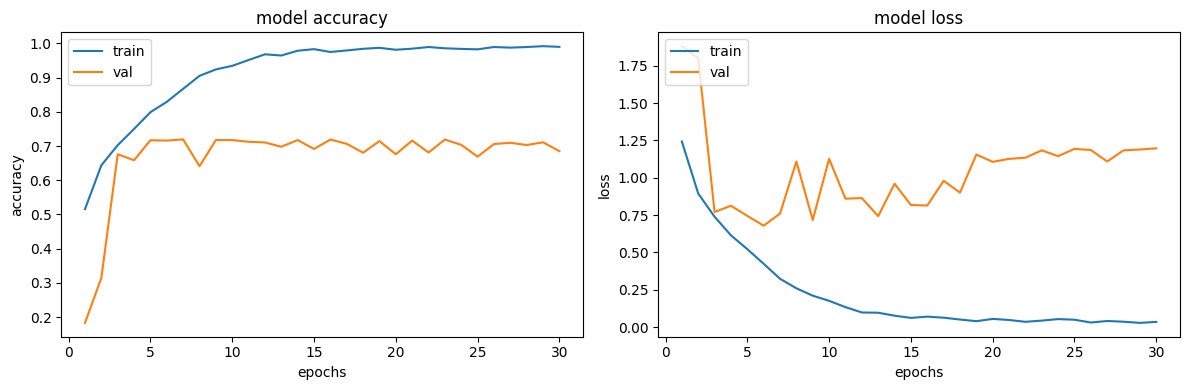

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
dual_att_model = build_model(classes=8)
dual_att_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 224, 224, 64)         18496     ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 224, 224, 64)         36928     ['conv2d_1[0][0]']            
                                                                                              

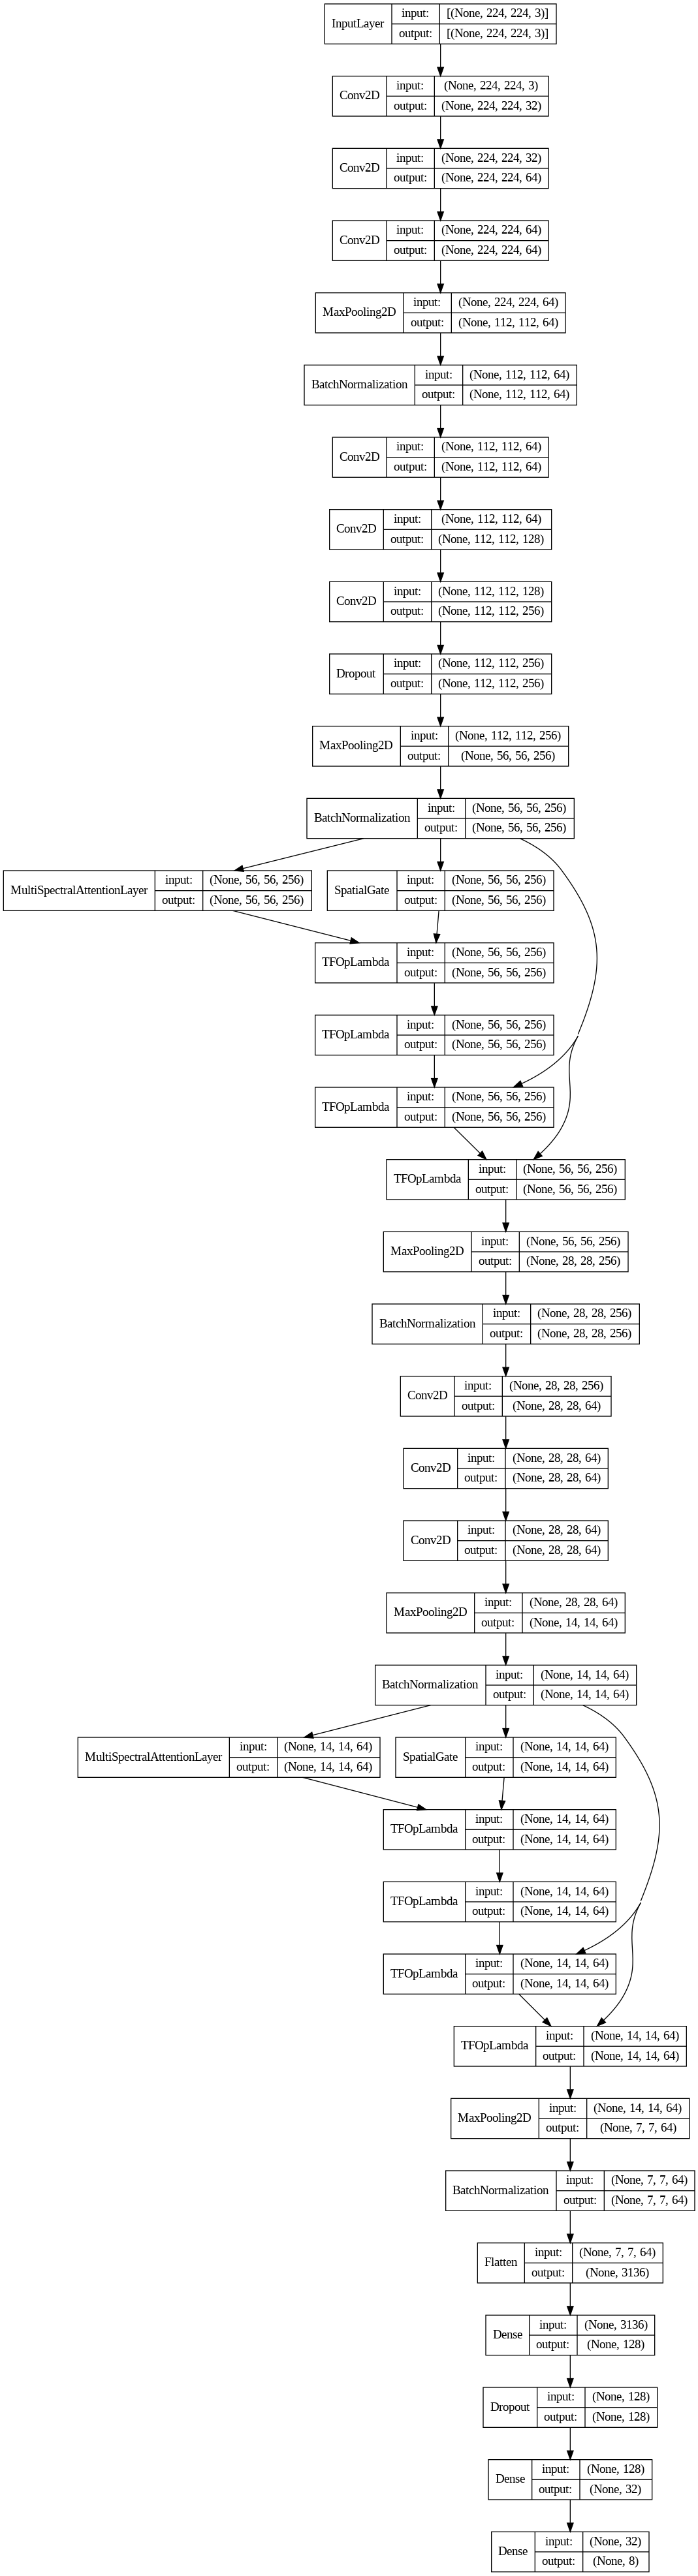

In [ ]:
tf.keras.utils.plot_model(dual_att_model, show_shapes = True, show_layer_names =False, rankdir="TB", expand_nested =True)

In [ ]:
# Load weight model
# model_1 = tf.keras.models.load_model(
#     './model_weight/KvasirPogorelov/model-30-0.79.h5',
#     custom_objects={'MultiSpectralAttentionLayer':MultiSpectralAttentionLayer,
#                     'SpatialGate': SpatialGate})
# model_1

In [ ]:
filepath = "./model_weight/KvasirPogorelov/model-{epoch:02d}-{val_sparse_categorical_accuracy:.2f}.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath,
                                             monitor='val_acc',
                                             verbose=0,
                                             save_best_only=False, mode='max')
history = dual_att_model.fit(train_ds,
                            validation_data=test_ds,
                            epochs=30,
                            verbose=1,
                            shuffle=True,
                            callbacks=[checkpoint])

Epoch 1/30
125/125 [==============================] - 98s 692ms/step - loss: 1.4746 - sparse_categorical_accuracy: 0.4090 - val_loss: 2.0564 - val_sparse_categorical_accuracy: 0.1725
Epoch 2/30
125/125 [==============================] - 85s 663ms/step - loss: 0.9123 - sparse_categorical_accuracy: 0.6010 - val_loss: 1.5397 - val_sparse_categorical_accuracy: 0.3665
Epoch 3/30
125/125 [==============================] - 87s 674ms/step - loss: 0.7612 - sparse_categorical_accuracy: 0.6647 - val_loss: 0.8811 - val_sparse_categorical_accuracy: 0.6165
Epoch 4/30
125/125 [==============================] - 95s 743ms/step - loss: 0.6860 - sparse_categorical_accuracy: 0.7090 - val_loss: 1.0020 - val_sparse_categorical_accuracy: 0.5900
Epoch 5/30
125/125 [==============================] - 88s 686ms/step - loss: 0.6148 - sparse_categorical_accuracy: 0.7402 - val_loss: 0.6007 - val_sparse_categorical_accuracy: 0.7380
Epoch 6/30
125/125 [==============================] - 85s 661ms/step - loss: 0.5585 -

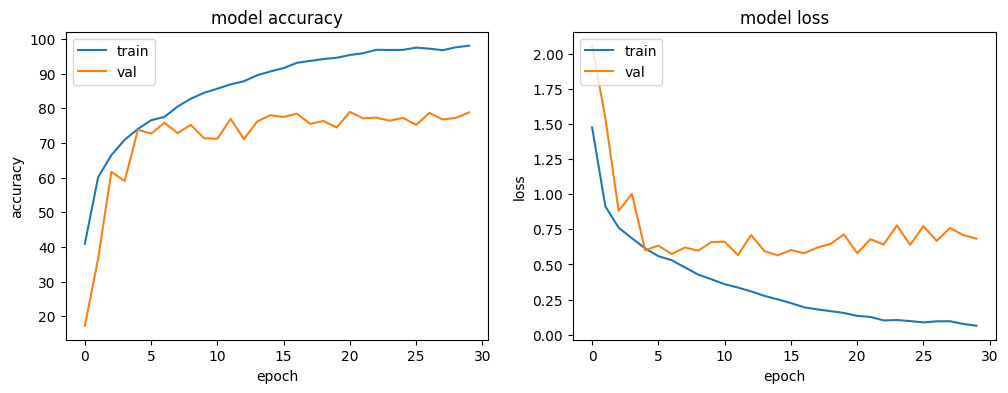

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot([acc*100 for acc in history.history['sparse_categorical_accuracy']])
plt.plot([acc*100 for acc in history.history['val_sparse_categorical_accuracy']])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## ISIC2018 Dataset Visualization

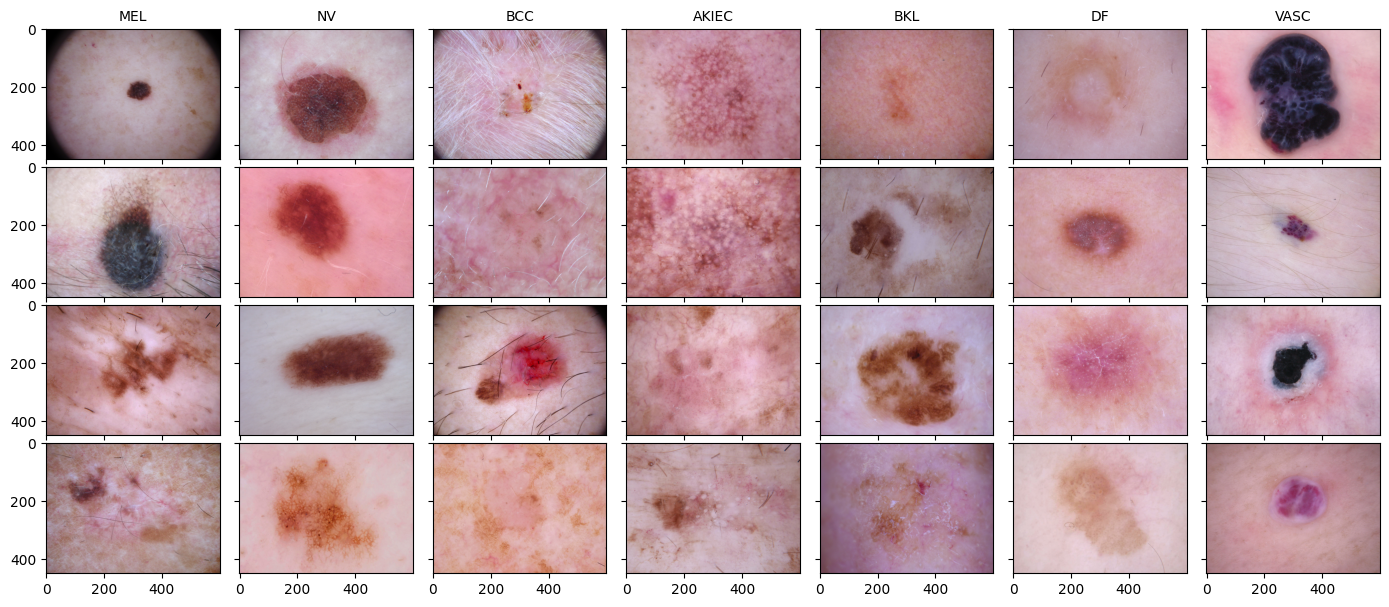

In [ ]:
from matplotlib import pyplot as plt
x = './data/processed_data/ISIC2018/train'
imgs = []
for folder in os.listdir(x):
    imgs.append([*map(lambda file_name: (file_name, folder), random.sample(os.listdir(f'{x}/{folder}'),4))])

fig, ax = plt.subplots(4, 7, sharex=True, sharey=True, figsize=(14,6))

for i, img in enumerate(imgs):
    for j in range(len(img)):
        ax[j][i].imshow(plt.imread(f'{x}/{img[j][1]}/{img[j][0]}'))
        ax[j][i].set_aspect('equal')
    ax[0][i].set_title(img[0][1], size = 10)

plt.subplots_adjust(wspace=1, hspace=0.2)
plt.tight_layout()

In [ ]:
train_dir = './data/processed_data/ISIC2018/train'
test_dir = './data/processed_data/ISIC2018/test'
train_ds, test_ds = create_ds(train_dir, test_dir)

Found 7010 files belonging to 7 classes.
Found 3005 files belonging to 7 classes.


## Training on ISIC 2018

In [ ]:
cnn_model = cnn_model(classes = 7)
cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 112, 112, 64)      256       
 Normalization)                                              

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "./model_weight/KvasirPogorelov/best.h5",
     save_best_only=True)

history = cnn_model.fit(train_ds,
                        validation_data=test_ds,
                        epochs=25,
                        verbose=1,
                        shuffle=True,
                        callbacks=[checkpoint])

Epoch 1/25
220/220 [==============================] - ETA: 0s - loss: 1.1588 - sparse_categorical_accuracy: 0.6278 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


220/220 [==============================] - 3751s 16s/step - loss: 1.1588 - sparse_categorical_accuracy: 0.6278 - val_loss: 1.2635 - val_sparse_categorical_accuracy: 0.6433
Epoch 2/25
220/220 [==============================] - 138s 616ms/step - loss: 0.9810 - sparse_categorical_accuracy: 0.6679 - val_loss: 1.0007 - val_sparse_categorical_accuracy: 0.6699
Epoch 3/25
220/220 [==============================] - 130s 582ms/step - loss: 0.9112 - sparse_categorical_accuracy: 0.6777 - val_loss: 1.5339 - val_sparse_categorical_accuracy: 0.6709
Epoch 4/25
220/220 [==============================] - 130s 581ms/step - loss: 0.9034 - sparse_categorical_accuracy: 0.6765 - val_loss: 1.0142 - val_sparse_categorical_accuracy: 0.6662
Epoch 5/25
220/220 [==============================] - 128s 572ms/step - loss: 0.8466 - sparse_categorical_accuracy: 0.6896 - val_loss: 1.1147 - val_sparse_categorical_accuracy: 0.6672
Epoch 6/25
220/220 [==============================] - 127s 569ms/step - loss: 0.8104 - spars

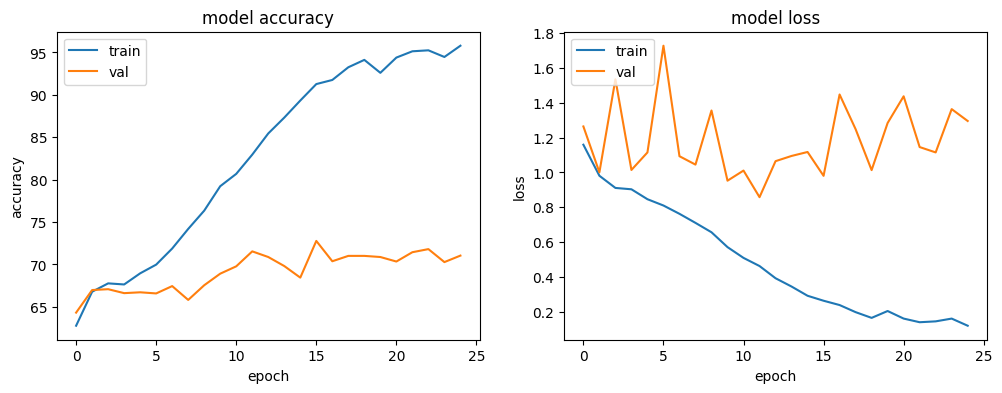

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot([acc*100 for acc in history.history['sparse_categorical_accuracy']])
plt.plot([acc*100 for acc in history.history['val_sparse_categorical_accuracy']])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Dual attention model

In [ ]:
dual_att_model = build_model(classes = 7)
dual_att_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 224, 224, 64)         18496     ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 224, 224, 64)         36928     ['conv2d_1[0][0]']            
                                                                                              

In [ ]:
filepath = "./model_weight/ISIC2018_old/model-{epoch:02d}-{val_sparse_categorical_accuracy:.2f}.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath,
                                             monitor='val_acc',
                                             verbose=0,
                                             save_best_only=False, mode='max')
history = dual_att_model.fit(train_ds,
                            validation_data=test_ds,
                            epochs=25,
                            verbose=1,
                            shuffle=True,
                            callbacks=[checkpoint])

Epoch 1/25
220/220 [==============================] - ETA: 0s - loss: 0.9858 - sparse_categorical_accuracy: 0.6708

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


220/220 [==============================] - 1213s 10s/step - loss: 0.9858 - sparse_categorical_accuracy: 0.6708 - val_loss: 1.0441 - val_sparse_categorical_accuracy: 0.6715
Epoch 2/25
220/220 [==============================] - 143s 642ms/step - loss: 0.8354 - sparse_categorical_accuracy: 0.7006 - val_loss: 0.9150 - val_sparse_categorical_accuracy: 0.6895
Epoch 3/25
220/220 [==============================] - 142s 637ms/step - loss: 0.7614 - sparse_categorical_accuracy: 0.7247 - val_loss: 0.9275 - val_sparse_categorical_accuracy: 0.6795
Epoch 4/25
220/220 [==============================] - 143s 641ms/step - loss: 0.7172 - sparse_categorical_accuracy: 0.7404 - val_loss: 0.9921 - val_sparse_categorical_accuracy: 0.6795
Epoch 5/25
220/220 [==============================] - 142s 637ms/step - loss: 0.6786 - sparse_categorical_accuracy: 0.7511 - val_loss: 0.7538 - val_sparse_categorical_accuracy: 0.7231
Epoch 6/25
220/220 [==============================] - 141s 633ms/step - loss: 0.6371 - spars

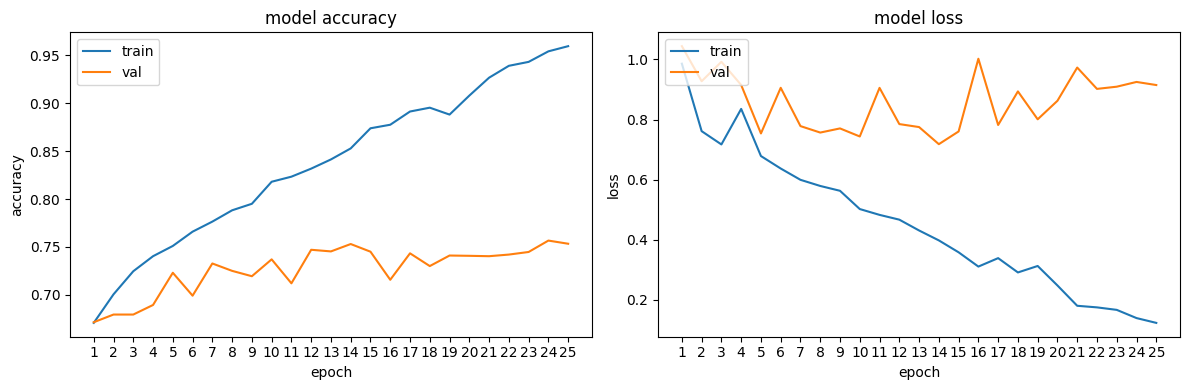

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.show()